### Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Exporting Dataset

In [4]:
#Cleaned rainfall dataset
d1 = r"D:\Data Science\Internship\TA\rain_data.csv"
rain_data = pd.read_csv(d1)

In [5]:
#South West Monsoon dataset
d2 = r"D:\Data Science\Internship\TA\SP-India-Rainfall-act-dep_1901_to_2019_0.csv"
swm_data = pd.read_csv(d2)

#### Visualizing the Indian Map

In [6]:
#Plotting the shape file of India Map with geopandas
img = r"D:\Data Science\Internship\TA\shape_file\Indian_states.shp"
ind_st = gpd.read_file(img)

<AxesSubplot:>

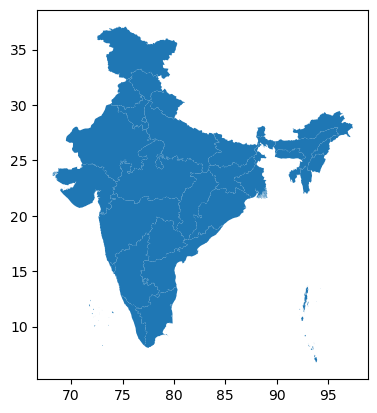

In [80]:
ind_st.plot()

#### Visualizing the change in Indian Map in the past decades 

We do this visualization to find how the weather changes in each 30 years are considered to be taken as the climate of India

In [23]:
def changes_in_last_decades(month):
    start_year = 1967
    end_year = 2017
    for year in range(start_year,end_year+1,10):
        year_data = rain_data[rain_data["YEAR"] == year][month]
        ind_st[f"{year}"] = year_data.values
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 25))
    year = start_year
    vmin = min(rain_data[month])
    vmax = max(rain_data[month])
    for i in range(nrows):
        for j in range(ncols):
            ax[i,j] = ind_st.plot(ax=ax[i,j], column=f'{year}', legend=True, cmap='RdYlGn_r', vmin = vmin,vmax=vmax)
            ax[i,j].set_title(f'{year}',fontsize=15)
            year +=10
            if year > end_year+1:
                break

In [28]:
rain_data[rain_data['ANNUAL']==rain_data['ANNUAL'].max()]

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
144,Arunanchal Pradesh,1948,35.6,119.5,136.1,441.1,1168.6,889.5,2362.8,603.3,350.4,150.1,52.7,21.4,6331.1,155.1,1745.8,4206.0,224.2


In [27]:
min(rain_data['ANNUAL'])

167.95000000000002

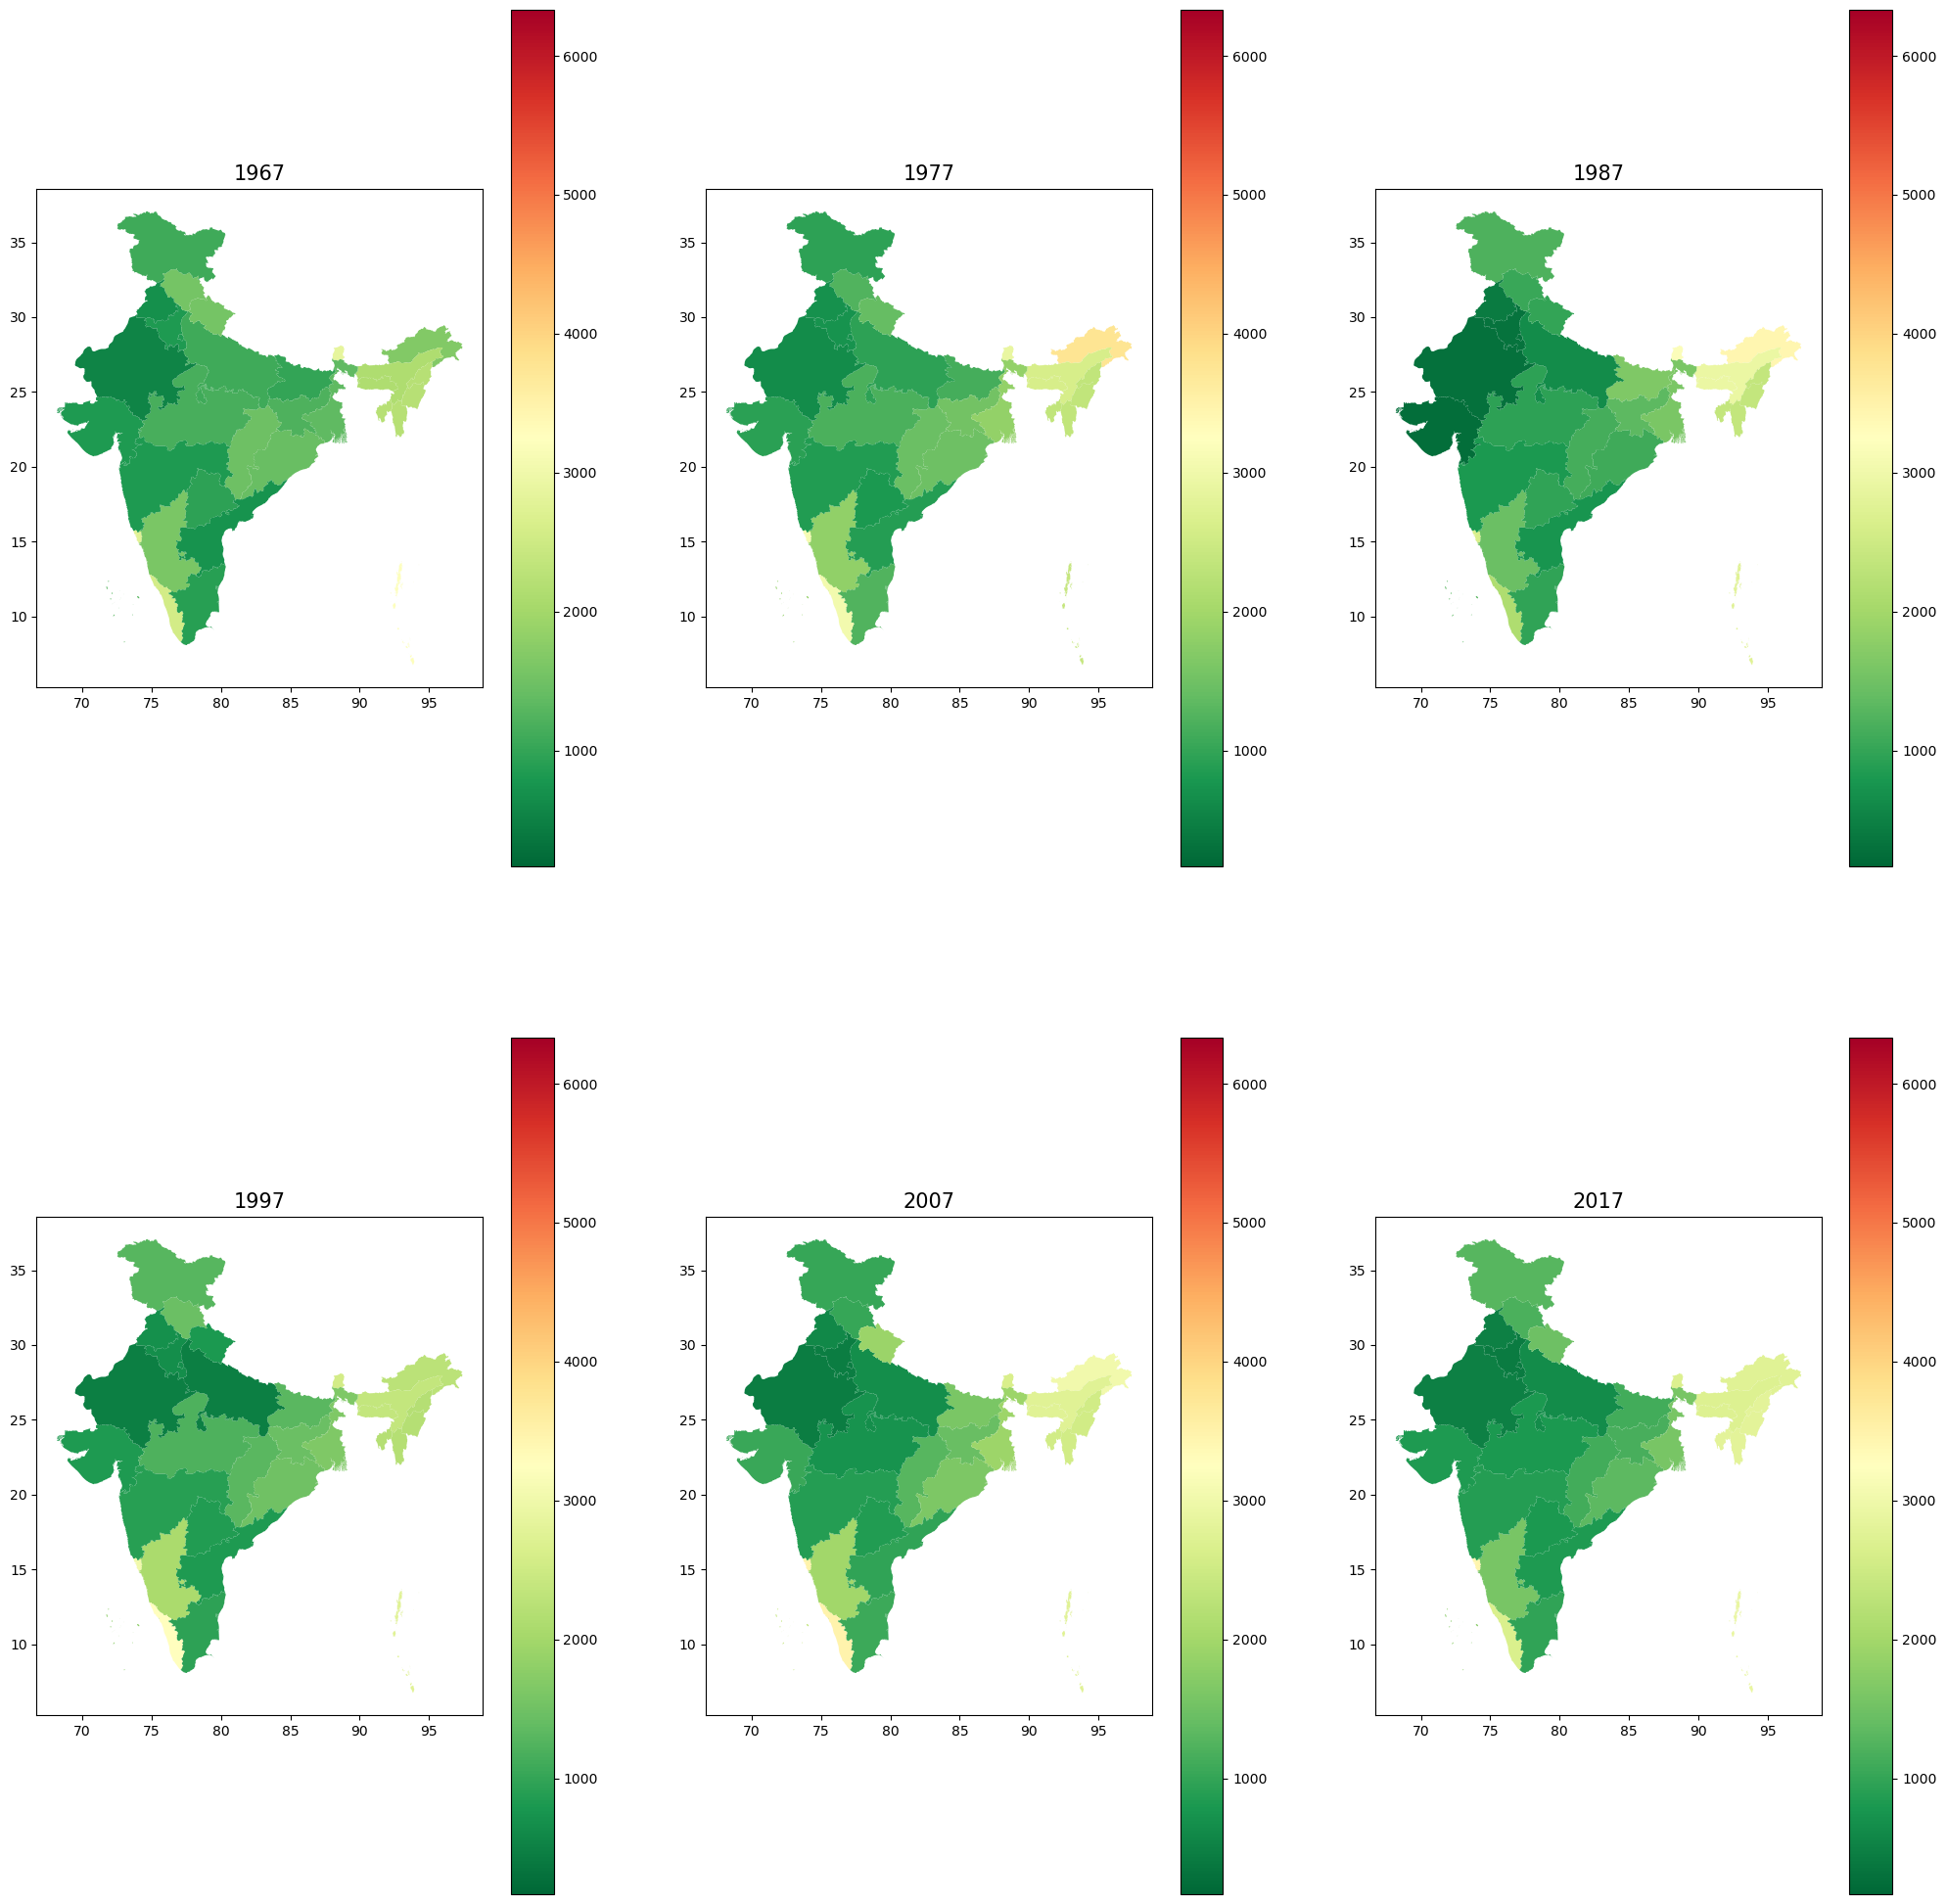

In [24]:
changes_in_last_decades("ANNUAL")

From these graphs we can see that North Eastern areas, Goa and Kerala is receiving majority of the rainfall recorded in India 

###### Let us now visualize how much rainfall India has received in time period 1901 to 2017

We use a time series plot to visualize the above mentioned

In [8]:
#Summarizing the required data from the cleaned rainfall using pivot table  
rain_hg = pd.pivot_table(rain_data, values = 'ANNUAL', index ='YEAR') #By default gives average 

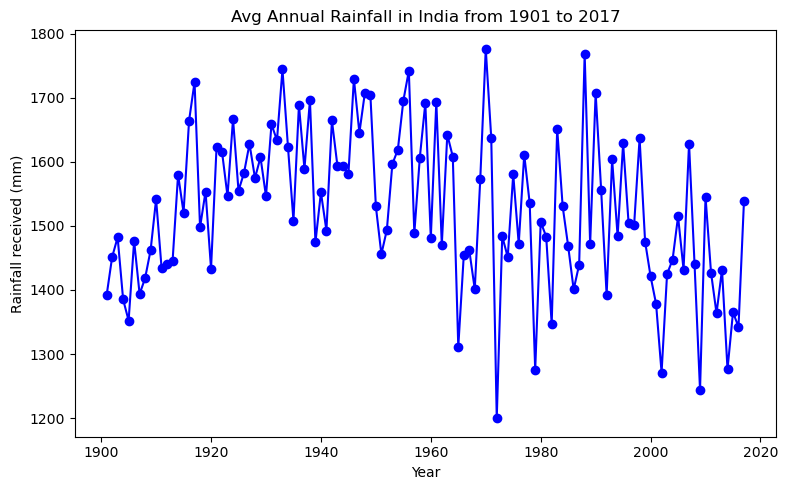

In [9]:
#Plotting time series using mathplotlib
fig = plt.figure(figsize = (8,5))
plt.plot(rain_hg.index,rain_hg.values,marker='o',linestyle ='-',color = 'blue')

plt.title('Avg Annual Rainfall in India from 1901 to 2017')
plt.xlabel('Year')
plt.ylabel('Rainfall received (mm)')

plt.tight_layout()
plt.show()

From the above graph, Since it is showing the average values, we cannot conclude if all the Indian States are receiving almost equal amounts of precipitation or if the average is nullified by the states receiving high and low amounts of rainfall.

#### Finding the year where maximum and minimum rainfall is recorded

In [18]:
for year in rain_data['YEAR']:
    if min(rain_data['ANNUAL'])

167.95000000000002

#### Visualizing the monthly rainfall in India

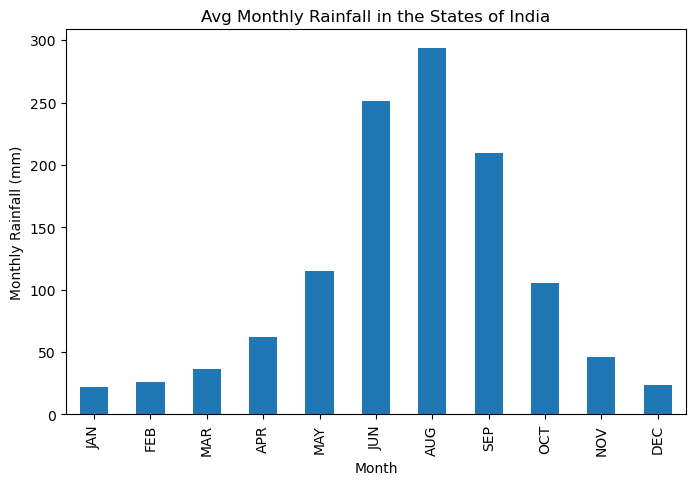

In [150]:
#Selecting the required data
ax = rain_data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,figsize=(8,5))

plt.xlabel('Month')
plt.ylabel('Monthly Rainfall (mm)')
plt.title('Avg Monthly Rainfall in the States of India')

ax.tick_params(labelsize = 10)
plt.show()

From the above graph we can see there is an increase in rainfall during the months of June to September and then a gradual decrease. Rainfall received during June to September are called SouthWest Monsoon.

#### Visualizing the percentage of quarterly rainfall in India

We are visualizing the above mentioned using a donut pie chart

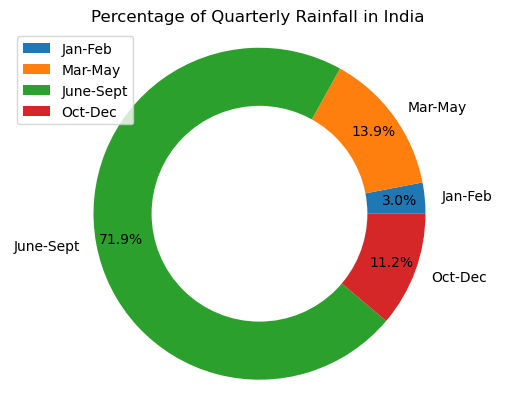

In [226]:
#Plotting using donut pie chart
sizes = [rain_data['JF'].sum(),rain_data['MAM'].sum(),rain_data['JJAS'].sum(),rain_data['OND'].sum()]
labels = ['Jan-Feb','Mar-May','June-Sept','Oct-Dec']

plt.pie(sizes,labels=labels,autopct='%1.1f%%',pctdistance=0.85)
plt.axis('equal')

circle = plt.Circle(xy=(0,0),radius = 0.65,fc ='white')
plt.gca().add_artist(circle)

plt.title('Percentage of Quarterly Rainfall in India')
plt.legend(labels,loc= "upper left")
plt.show()

From the above figure, it is clearly evident that the rainfall is highest during the months of June to September. Around 72% of the total rainfall is received by the Southwest monsoon

#### Visualizing the Southwest Monsoon period

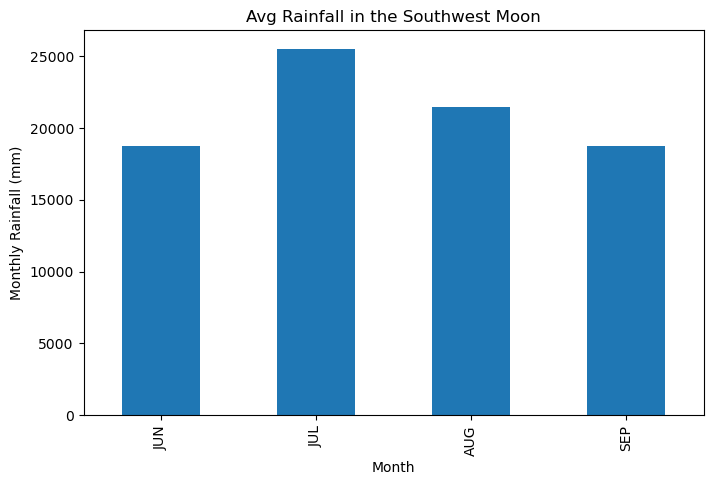

In [331]:
ax_1 = swm_data[['JUN', 'JUL','AUG', 'SEP']].sum().plot.bar(width=0.5,figsize=(8,5))

plt.xlabel('Month')
plt.ylabel('Monthly Rainfall (mm)')
plt.title('Avg Rainfall in the Southwest Moon')

ax_1.tick_params(labelsize = 10)
plt.show()

The maximum rainfall received in the Southwest monsoon is the month of July

#### Finding out which states receive the max and min rainfall 

In [317]:
#The state having max rainfall
rainfall = rain_data.groupby('SUBDIVISION').mean()['ANNUAL'].sort_values(ascending=False).head(1)
print(rainfall)

#The state having min rainfall
rainfall_1 = rain_data.groupby('SUBDIVISION').mean()['ANNUAL'].sort_values(ascending=False).tail(1)
print(rainfall_1)

SUBDIVISION
Arunanchal Pradesh    3403.95914
Name: ANNUAL, dtype: float64
SUBDIVISION
Rajasthan    475.313675
Name: ANNUAL, dtype: float64


The maximum rainfall on an average is received in Arunachal Pradeah and the minimum rainfall on an average is received in Rajasthan

### Kerala

#### Cleaning dataset

In [234]:
d3 = r"D:\Data Science\Internship\TA\district wise rainfall normal.csv"
dist_data = pd.read_csv(d3)

In [235]:
def clean_district(text):
    if '(' in text:
        text_list = text.split('(')
        return text_list[0]
    else:
        if '/' in text:
            text_list = text.split('/')
            return text_list[0]
        else:
            return text       

In [236]:
#Removing unneccesary words and punct from district
dist_data['DISTRICT'] = dist_data['DISTRICT'].apply(clean_district)

In [237]:
#Converting the name of state_ut_name to subdivision
dist_data = dist_data.rename(columns={'STATE_UT_NAME': 'SUBDIVISION'})

In [238]:
#Converting all to Sentence Case
dist_data['DISTRICT']= dist_data['DISTRICT'].map(lambda x: x.title())
dist_data['SUBDIVISION'] = dist_data['SUBDIVISION'].map(lambda x: x.title())

In [239]:
#Cleaning the state names
dist_data['SUBDIVISION'].replace('Andaman And Nicobar Islands','Andaman & Nicobar Island',inplace = True)
dist_data['SUBDIVISION'].replace('Orissa','Odisha',inplace = True)
dist_data['SUBDIVISION'].replace('Uttaranchal','Uttarakhand',inplace = True)
dist_data['SUBDIVISION'].replace('Chatisgarh','Chhattisgarh',inplace = True)
dist_data['SUBDIVISION'].replace('Dadar Nagar Haveli','Dadara & Nagar Havelli',inplace = True)
dist_data['SUBDIVISION'].replace('Daman And Dui','Daman & Dui',inplace = True)
dist_data['SUBDIVISION'].replace('Himachal','Himachal Pradesh',inplace = True)
dist_data['SUBDIVISION'].replace('Pondicherry','Puducherry',inplace = True)
dist_data['SUBDIVISION'].replace('Delhi','NCT of Delhi',inplace = True)
dist_data['SUBDIVISION'].replace('Jammu And Kashmir','Jammu & Kashmir',inplace = True)

In [247]:
#Selecting only the Kerala State details
ker_data = dist_data[(dist_data['SUBDIVISION'] == 'Kerala') & (dist_data['ANNUAL']) & (dist_data['DISTRICT'])]

In [248]:
#Manually correcting the mispelled districts
ker_data['DISTRICT'].replace('Cannur','Kannur',inplace = True)
ker_data['DISTRICT'].replace('Thiruvanantha','Thiruvananthapuram',inplace = True)

In [249]:
ker_data

,SUBDIVISION,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
626,Kerala,Alappuzha,17.5,27.9,45.1,134.0,298.7,593.0,533.0,343.1,276.8,332.9,187.6,51.6,2841.2,45.4,477.8,1745.9,572.1
627,Kerala,Kannur,2.5,2.0,7.6,57.9,235.0,852.4,1055.0,540.9,220.7,229.4,91.6,24.1,3319.1,4.5,300.5,2669.0,345.1
628,Kerala,Ernakulam,13.2,18.8,31.2,112.0,300.4,696.4,670.2,401.3,297.1,299.9,145.0,44.4,3029.9,32.0,443.6,2065.0,489.3
629,Kerala,Kottayam,13.0,24.9,42.3,136.1,281.8,649.1,591.4,386.0,270.8,316.6,177.4,41.1,2930.5,37.9,460.2,1897.3,535.1
630,Kerala,Kozhikode,2.3,3.9,15.1,80.9,256.6,895.8,955.2,500.9,251.2,262.1,130.1,30.0,3384.1,6.2,352.6,2603.1,422.2
631,Kerala,Malappuram,1.7,3.9,12.7,86.8,221.3,660.9,792.9,395.3,211.3,290.4,135.1,22.8,2835.1,5.6,320.8,2060.4,448.3
632,Kerala,Palakkad,2.9,6.5,22.5,98.7,158.7,464.3,595.4,333.8,179.2,263.8,138.6,25.6,2290.0,9.4,279.9,1572.7,428.0
633,Kerala,Kollam,17.5,33.7,62.6,158.5,248.5,457.7,398.0,258.7,217.9,362.7,221.4,54.5,2491.7,51.2,469.6,1332.3,638.6
634,Kerala,Thrissur,3.4,7.5,17.0,79.2,289.1,707.4,772.9,440.1,277.1,296.3,138.1,35.0,3063.1,10.9,385.3,2197.5,469.4
635,Kerala,Thiruvananthapuram,19.3,21.1,35.5,116.7,216.6,338.7,228.9,142.0,161.7,268.0,192.0,62.7,1803.2,40.4,368.8,871.3,522.7


#### Visualizing Kerala with the districts

In [191]:
img_1 = r"D:\Data Science\Internship\TA\shape_file\gadm36_IND_2.shp"
ind_dist = gpd.read_file(img_1)

In [192]:
ind_dist['NAME_1'].unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'NCT of Delhi', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [193]:
ind_dist = ind_dist.rename(columns={'NAME_1': 'SUBDIVISION','NAME_2': 'DISTRICT'})

In [202]:
ind_dist = ind_dist[ind_dist['SUBDIVISION']=='Kerala']

<AxesSubplot:>

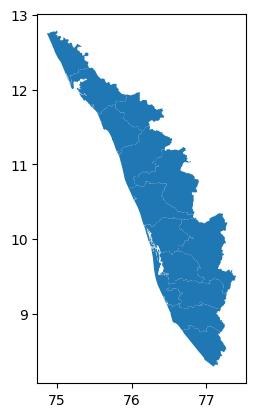

In [203]:
ind_dist.plot()

#### Visualizing the changes in the rainfall pattern in Kerala

In [215]:
dist_map = ind_st[ind_st['st_nm']=='Kerala']

<AxesSubplot:>

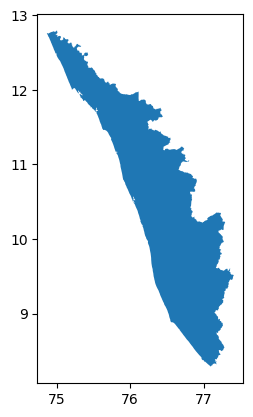

In [216]:
dist_map.plot()

In [289]:
def changes_in_last_years(month):
    start_year = 2009
    end_year = 2017
    for year in range(start_year,end_year+1):
        year_data = rain_data[(rain_data["YEAR"] == year) & (rain_data['SUBDIVISION']=='Kerala')][month]
        dist_map[f"{year}"] = year_data.values
    nrows = 3
    ncols = 3
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
    year = start_year
    for i in range(nrows):
        for j in range(ncols):
            ax[i,j] = dist_map.plot(ax=ax[i,j], column=f'{year}', legend=True, cmap='RdYlGn_r')
            ax[i,j].set_title(f'{year}',fontsize=15)
            year +=1
            if year > end_year+1:
                break

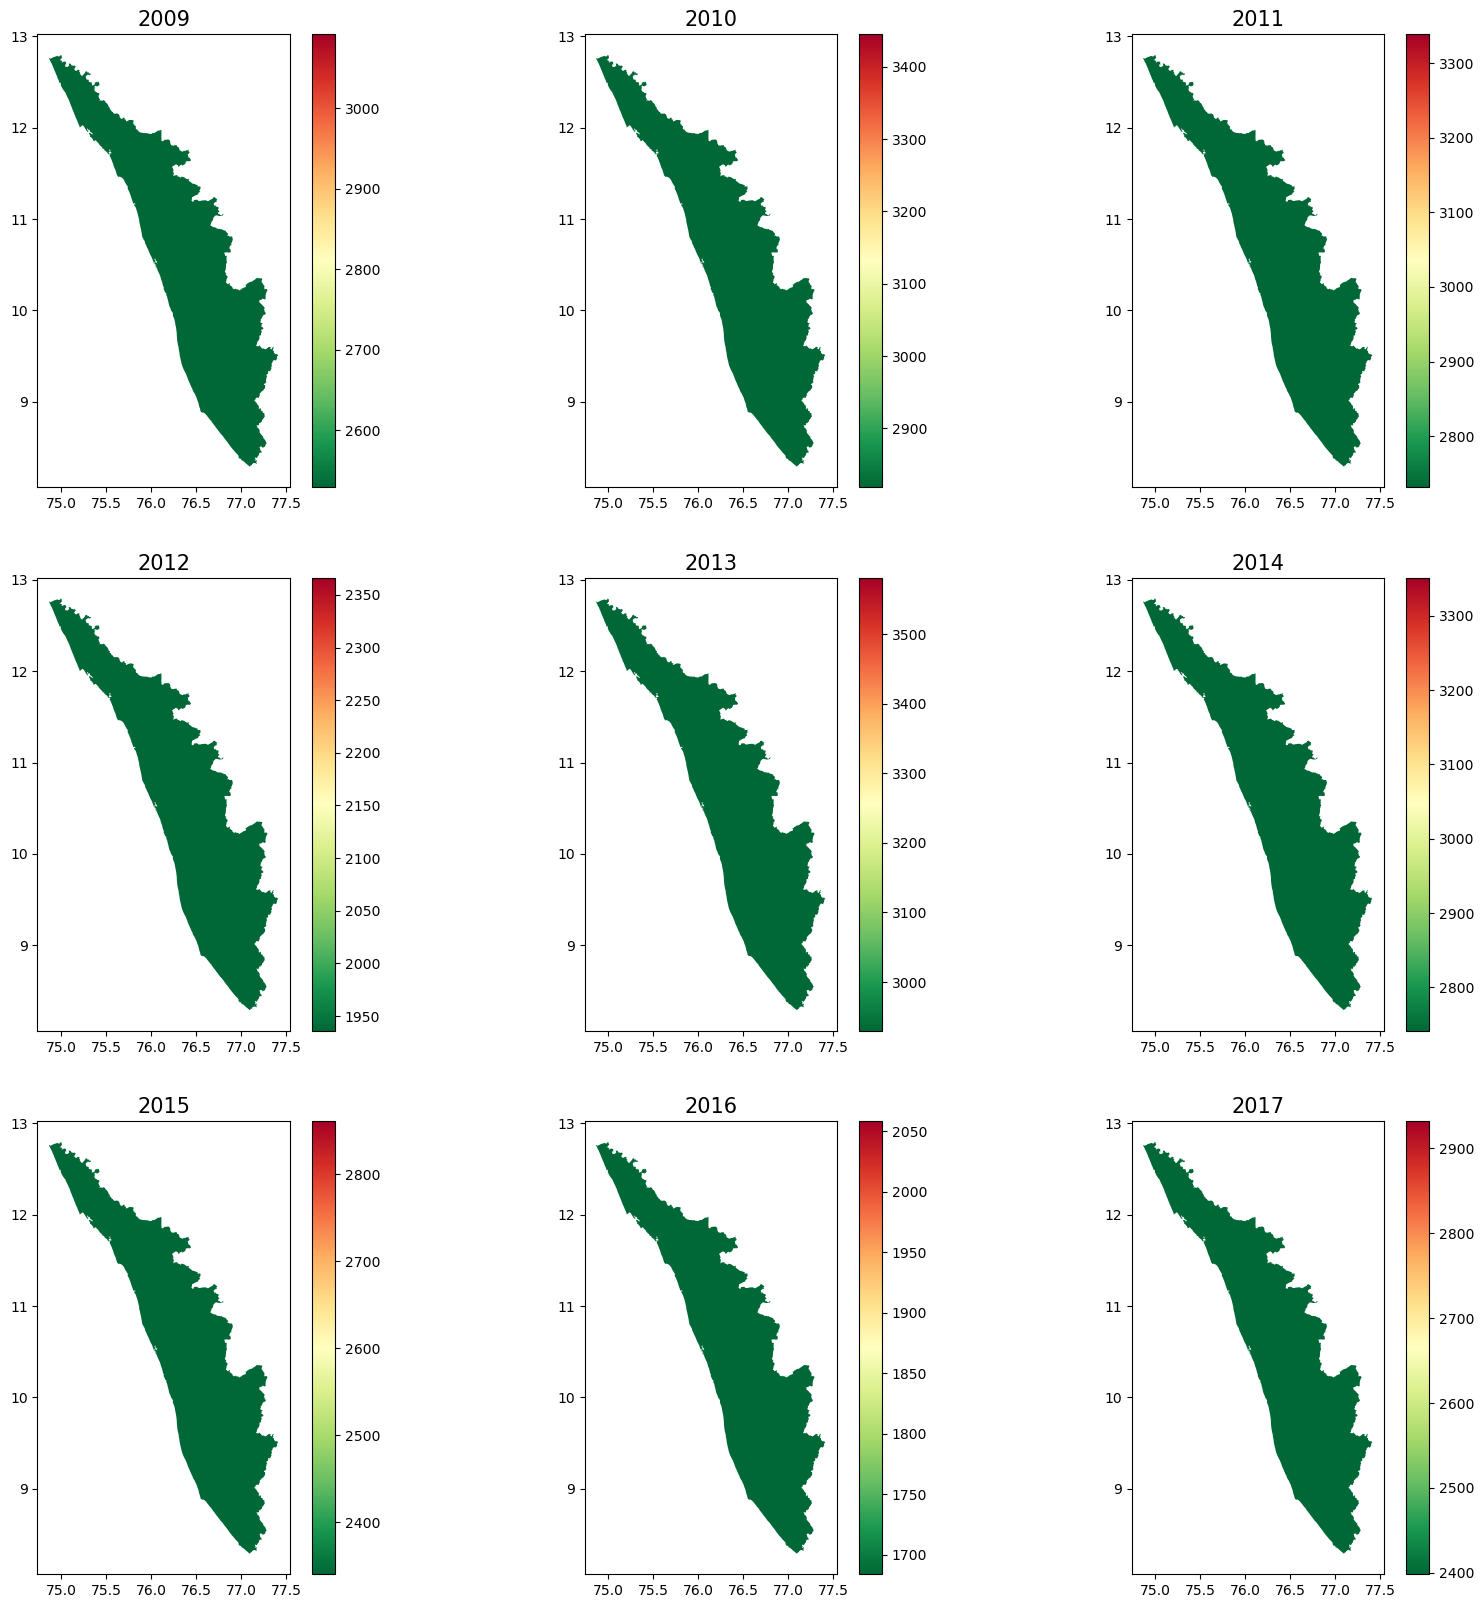

In [290]:
changes_in_last_years('ANNUAL')

From the above graphs, we can see Kerala has been receiving comparatively low amounts of rainfall from 2009 - 2017. Let us now visualize which districts are the ones receiving the max and min rainfall

#### Visualizing  the district wise rainfall in Kerala

In [293]:
#Sorting the District names alphabetically
ker_data.sort_values(by = ['DISTRICT'],inplace=True)

In [294]:
#Renaming for join function
ind_dist = ind_dist.rename(columns={'SUBDIVISION': 'State'})

In [276]:
#Joining shape file and csv file based on District as the index
merged_df = ind_dist.set_index('DISTRICT').join(ker_data.set_index('DISTRICT'))

In [278]:
#Resetting the numeric index
merged_df.reset_index(level=0, inplace=True)
merged_df.head()

,DISTRICT,GID_0,NAME_0,GID_1,State,NL_NAME_1,GID_2,VARNAME_2,NL_NAME_2,TYPE_2,...,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,Alappuzha,IND,India,IND.17_1,Kerala,None,IND.17.1_1,Alleppey,None,District,...,343.1,276.8,332.9,187.6,51.6,2841.2,45.4,477.8,1745.9,572.1
1,Ernakulam,IND,India,IND.17_1,Kerala,None,IND.17.2_1,None,None,District,...,401.3,297.1,299.9,145.0,44.4,3029.9,32.0,443.6,2065.0,489.3
2,Idukki,IND,India,IND.17_1,Kerala,None,IND.17.3_1,Idikki,None,District,...,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
3,Kannur,IND,India,IND.17_1,Kerala,None,IND.17.4_1,Cannanore,None,District,...,540.9,220.7,229.4,91.6,24.1,3319.1,4.5,300.5,2669.0,345.1
4,Kasaragod,IND,India,IND.17_1,Kerala,None,IND.17.5_1,None,None,District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Kerala rainfall in each districts'}>

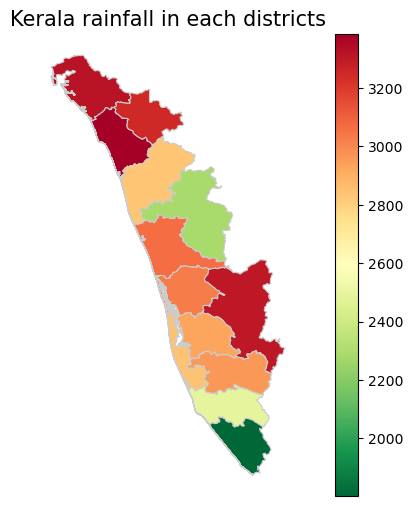

In [288]:
#Plotting the Map
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Kerala rainfall in each districts', fontdict={'fontsize': '15', 'fontweight' : '3'})
# plot the figure
merged_df.plot(column='ANNUAL', cmap= "RdYlGn_r", linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

From just the visual representation we can see that Northen districts is receiving the max rainfall and the lowest is seen in Thiruvanthapuram. We shall confirm this by finding the actual statistics

##### Finding the district that receives on an average the maximum and minimum rainfall

In [299]:
ker_data.groupby('DISTRICT').mean()['ANNUAL'].sort_values(ascending=False)

DISTRICT
Kasargod              3621.6
Kozhikode             3384.1
Kannur                3319.1
Idukki                3302.5
Wayanad               3253.1
Thrissur              3063.1
Ernakulam             3029.9
Pathanamthitta        2958.4
Kottayam              2930.5
Alappuzha             2841.2
Malappuram            2835.1
Kollam                2491.7
Palakkad              2290.0
Thiruvananthapuram    1803.2
Name: ANNUAL, dtype: float64

Therefore from above we can conclude that on an average the maximum rainfall is received in Kasargod District and the lowest is in Thiruvanthapuram

### Trails - Data Cleaning

In [98]:
groups = year_data.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']
data = groups.get_group(('Andaman & Nicobar Islands'))
data.head()

C:\Users\Elsa\AppData\Local\Temp\ipykernel_62820\1277738757.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groups = year_data.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,558.2,33.6
1,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,359.0,160.5
2,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,284.4,225.0
3,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,308.7,40.1
4,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,25.4,344.7


In [99]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
count,112.000000,112.000000,112.000000,110.000000,110.000000,111.000000,110.000000,110.000000,110.000000,109.000000,110.000000,109.000000
mean,1959.946429,54.382143,27.685714,31.594545,71.916364,354.829730,470.083636,399.047273,398.613636,440.382569,233.018182,157.466972
std,34.230232,74.541814,38.125121,48.403859,65.754338,149.518992,146.561939,149.615144,139.539794,152.325310,116.686605,131.218458
min,1901.000000,0.000000,0.000000,0.000000,0.000000,62.000000,148.800000,45.300000,101.300000,126.200000,22.800000,0.400000
25%,1929.750000,10.500000,1.775000,3.100000,21.225000,258.200000,369.925000,302.700000,320.775000,332.600000,151.100000,67.100000
50%,1961.500000,32.100000,12.650000,12.150000,54.800000,317.300000,450.250000,379.500000,376.400000,428.800000,229.950000,115.200000
75%,1989.250000,76.275000,35.600000,33.150000,106.625000,423.700000,546.475000,485.675000,467.625000,521.200000,300.400000,225.000000
max,2017.000000,583.700000,173.800000,272.800000,323.100000,973.100000,965.600000,918.500000,924.900000,868.900000,648.900000,617.500000


In [104]:
year_data.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [105]:
year_data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4


C:\Users\Elsa\AppData\Local\Temp\ipykernel_62820\317759349.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['FEB'], hist = True)


<AxesSubplot:xlabel='FEB', ylabel='Density'>

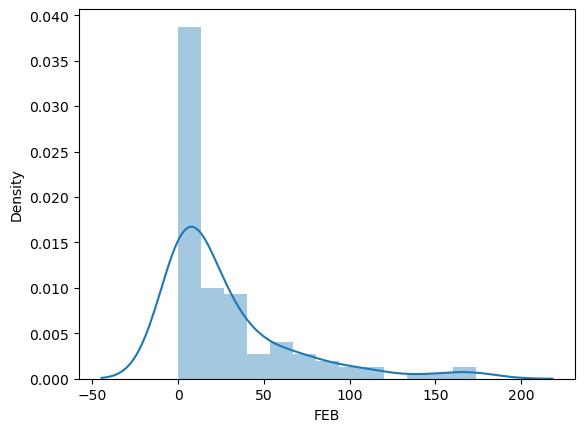

In [114]:
sns.distplot(data['FEB'], hist = True)

In [115]:
data['FEB'].mean()

27.685714285714287

In [116]:
data['FEB'].median()

12.65

In [117]:
data['FEB'].mode()

0    0.0
Name: FEB, dtype: float64

In [118]:
data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,558.2,33.6
1,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,359.0,160.5
2,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,284.4,225.0
3,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,308.7,40.1
4,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,25.4,344.7
...,...,...,...,...,...,...,...,...,...,...,...,...
107,2013,67.1,37.6,43.0,46.3,509.3,777.0,564.8,336.7,473.6,354.2,92.3
108,2014,41.9,8.6,0.0,11.1,238.0,416.6,467.6,321.6,412.9,201.2,100.4
109,2015,126.8,7.6,3.1,138.2,331.9,346.4,328.9,480.0,523.3,236.3,129.9
110,2016,72.0,15.8,5.4,2.4,191.1,429.4,301.2,227.7,604.3,181.7,533.7


In [120]:
year_data.interpolate(method ='linear', limit_direction ='forward', inplace=True)
year_data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4
